# How to interpret raster.tif and labeled.tif

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/home/savinien/Documents/Polonie/lidar-segment/lidar-segment/labeled.tif"
raster_path = "/home/savinien/Documents/Polonie/lidar-segment/lidar-segment/raster.tif"
image = cv2.imread(image_path)

Number of non-blue areas: 1


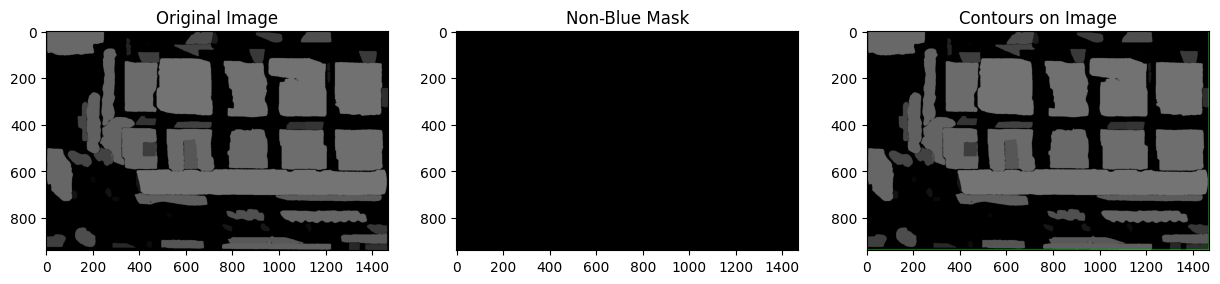

In [6]:
# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([140, 255, 255])

# Create a mask for blue areas
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Invert the mask to get non-blue areas
non_blue_mask = cv2.bitwise_not(blue_mask)

# Find contours in the non-blue mask
contours, _ = cv2.findContours(non_blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image for visualization
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Count the number of detected non-blue areas
num_non_blue_areas = len(contours)

print(f"Number of non-blue areas: {num_non_blue_areas}")

# Visualize the masks and contours
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(non_blue_mask, cmap="gray")
plt.title("Non-Blue Mask")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours on Image")

plt.show()

In [7]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
# visualize the binary image
'''
cv2.imshow('Binary image', thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()
'''


"\ncv2.imshow('Binary image', thresh)\ncv2.waitKey(0)\ncv2.imwrite('image_thres1.jpg', thresh)\ncv2.destroyAllWindows()\n"

Number of contours detected: 155
Number of non-blue areas: 155


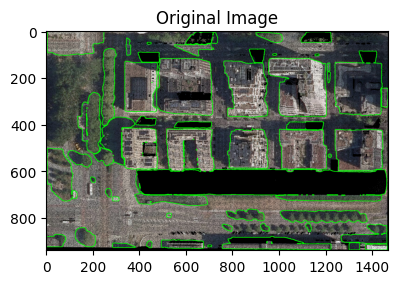

In [8]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image = cv2.imread(raster_path)
cv2.imshow("", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
       
nb_contours = len(contours)
print(f"Number of contours detected: {nb_contours}")         
                
# Draw contours on the original image for visualization
contour_image = image.copy()

cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Count the number of detected non-blue areas
num_non_blue_areas = len(contours)

print(f"Number of non-blue areas: {num_non_blue_areas}")

# Visualize the masks and contours
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.show()